In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
# The data is downloaded from the website https://coinmetrics.io/community-network-data/

In [37]:
dataset_train = pd.read_csv('BTC-USD.csv', index_col=0, parse_dates = True)
dataset_train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...
2021-11-26,58960.285156,59183.480469,53569.765625,53569.765625,53569.765625,4.181075e+10
2021-11-27,53736.429688,55329.257813,53668.355469,54815.078125,54815.078125,3.056086e+10
2021-11-28,54813.023438,57393.843750,53576.734375,57248.457031,57248.457031,2.811689e+10


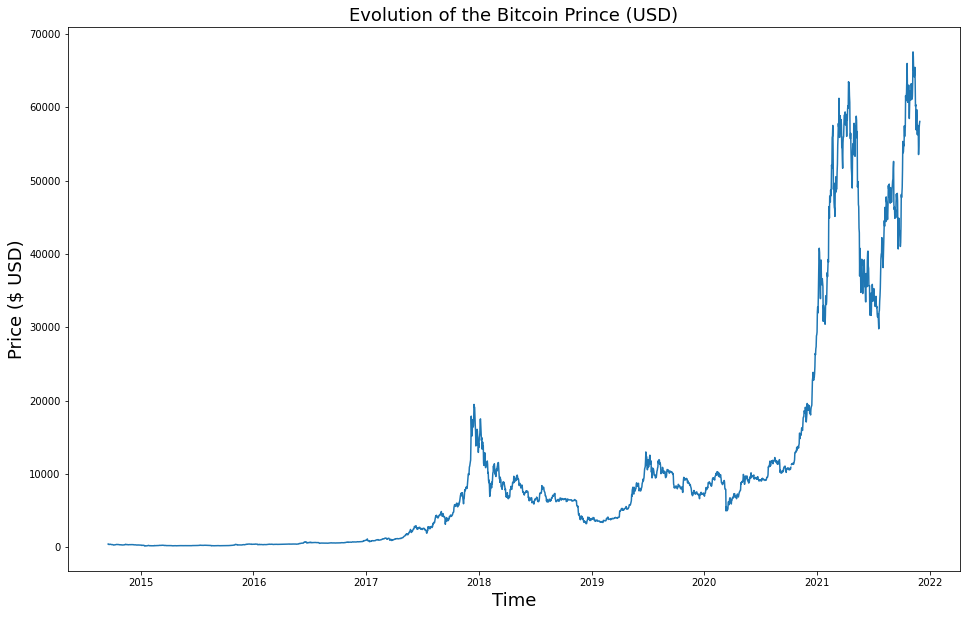

In [38]:
plt.figure(figsize = (16,10))
plt.title("Evolution of the Bitcoin Prince (USD)", fontsize = 18)
plt.xlabel("Time", fontsize = 18)
plt.ylabel("Price ($ USD)", fontsize = 18)
plt.plot(df_price['Close'])
plt.show()

In [39]:
training_set = dataset_train[['Close']].iloc[:-30].values

# Preprocessing of the data

In [40]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output

In [41]:
X_train = []
y_train = []
for i in range(60, training_set.shape[0]):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [42]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [43]:
X_train.shape

(2542, 60, 1)

# Building the Recurent Neural Network

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [45]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
80/80 [==============================] - 12s 61ms/step - loss: nan
Epoch 2/100
80/80 [==============================] - 5s 61ms/step - loss: nan
Epoch 3/100
80/80 [==============================] - 5s 61ms/step - loss: nan
Epoch 4/100
80/80 [==============================] - 5s 62ms/step - loss: nan
Epoch 5/100
80/80 [==============================] - 5s 61ms/step - loss: nan
Epoch 6/100
80/80 [==============================] - 5s 61ms/step - loss: nan
Epoch 7/100
80/80 [==============================] - 5s 61ms/step - loss: nan
Epoch 8/100
80/80 [==============================] - 5s 61ms/step - loss: nan
Epoch 9/100
80/80 [==============================] - 5s 62ms/step - loss: nan
Epoch 10/100
70/80 [=========================>....] - ETA: 0s - loss: nan

In [ ]:
dataset_total = pd.concat((dataset_train['Close'].iloc[:-30], dataset_train['Close'].iloc[30:]), axis = 0)
inputs = dataset_total[len(dataset_total) - 30 - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
real_stock_price = dataset_train['Close'].iloc[30:].values

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()